In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs
from matplotlib.animation import FuncAnimation, PillowWriter

In [66]:
x,y= make_blobs(n_samples=300, centers=9, cluster_std=1.0, random_state=42)

In [67]:
class My_Kmean_cluster:
    def __init__(self,n_cluster=3,max_iter=50) -> None:
        self.iter = max_iter
        self.centroid = []
        self.n_cluster = n_cluster
        self.cluster_group = []
        pass
   
    def get_scatter(self,x,y_cen,ax):
        if x.shape[1] == 2 :
            ax.scatter(x[:,0],x[:,1],c = y_cen)
            for i in self.centroid:
                ax.scatter(i[0],i[1])
        else :
            print("can't print multidemsiot")
        
    def assign_centroid(self,x):
        cluster_group = []
        for i in x:
            dist = []
            for j in self.centroid:
               dist.append(np.sqrt(np.dot(i-j,i-j)))
            cluster_group.append((dist.index(min(dist))))

        return np.array(cluster_group)

    def move_centroid(self,x,y_cen):
        new_centroid = []
        for i in np.unique(y_cen):
            value = x[y_cen==i].mean(axis=0)
            new_centroid.append(value)
            
        return new_centroid
    def fit_predict(self, x, animate=True, save_path=None):
        # Random centroid initialization
        idx = np.random.randint(0, len(x), self.n_cluster)
        self.centroid = x[idx]
        self.cluster_group = np.zeros(len(x))

        # Store history for animation
        centroids_history = [self.centroid.copy()]
        clusters_history = [self.cluster_group.copy()]

        for _ in range(self.iter):
            cluster_group = self.assign_centroid(x)
            new_centroid = self.move_centroid(x, cluster_group)

            centroids_history.append(new_centroid.copy())
            clusters_history.append(cluster_group.copy())

            # Stop if centroids converge
            if np.allclose(self.centroid, new_centroid):
                break
            self.centroid = new_centroid

        self.cluster_group = cluster_group

        # --- Animate if required ---
        if animate:
            fig, ax = plt.subplots(figsize=(5, 4))

            def update(frame):
                ax.clear()
                labels = clusters_history[frame]
                centroids = np.array(centroids_history[frame])  # ✅ convert to NumPy array

                ax.scatter(x[:, 0], x[:, 1], c=labels, cmap='viridis', alpha=0.6)
                ax.scatter(centroids[:, 0], centroids[:, 1], c='red', s=120, marker='X')
                ax.set_title(f"Iteration {frame+1}")
                ax.set_xlim(x[:, 0].min()-1, x[:, 0].max()+1)
                ax.set_ylim(x[:, 1].min()-1, x[:, 1].max()+1)


            ani = FuncAnimation(fig, update, frames=len(centroids_history), interval=800, repeat=False)

            if save_path:
                ani.save(save_path, writer=PillowWriter(fps=2))
                print(f"✅ Animation saved as {save_path}")
            else:
                plt.show()

        return self.cluster_group
    # def fit_predict(self,x):
    #     idx = np.random.randint(0,len(x),self.n_cluster)
    #     self.centroid = x[idx]
    #     cluster_group = []
    #     fig,ax = plt.subplots(ncols=1,nrows=1,figsize=(5,3))
    #     self.get_scatter(x,None,ax)
    #     for i in range(self.iter):
           
    #         cluster_group = self.assign_centroid(x)
    #         old_centroid = self.centroid
    #         self.centroid = self.move_centroid(x,cluster_group)
    #         if np.array_equal(np.sort(old_centroid),np.sort(self.centroid)):
    #             print("succesfull")
    #             break
            
    #         fig,ax = plt.subplots(ncols=1,nrows=1,figsize=(5,3))
    #         self.get_scatter(x,cluster_group,ax) 
    #     self.cluster_group= cluster_group 
    #     return cluster_group
        

In [76]:
my = My_Kmean_cluster(6,2500)

✅ Animation saved as kmeans_demo.gif


array([5, 3, 5, 2, 2, 1, 1, 1, 0, 4, 5, 5, 0, 5, 1, 1, 5, 4, 1, 1, 0, 4,
       1, 5, 1, 2, 3, 1, 2, 5, 4, 0, 5, 4, 2, 2, 1, 1, 1, 2, 2, 2, 4, 2,
       1, 1, 4, 5, 2, 5, 1, 5, 0, 0, 5, 4, 4, 3, 2, 3, 1, 5, 4, 4, 3, 5,
       1, 1, 3, 5, 5, 0, 0, 1, 5, 5, 5, 1, 4, 5, 2, 5, 1, 4, 1, 1, 0, 0,
       3, 5, 5, 5, 5, 3, 0, 3, 1, 5, 5, 3, 5, 4, 4, 1, 4, 0, 2, 1, 3, 0,
       2, 1, 2, 1, 4, 5, 0, 5, 5, 5, 1, 1, 5, 1, 5, 4, 4, 5, 5, 3, 3, 3,
       4, 3, 1, 5, 5, 3, 1, 4, 3, 4, 5, 5, 0, 5, 5, 0, 1, 4, 2, 5, 1, 2,
       4, 0, 5, 5, 4, 1, 0, 1, 2, 1, 5, 5, 0, 0, 1, 4, 5, 5, 2, 1, 1, 4,
       5, 5, 3, 1, 3, 5, 4, 1, 4, 4, 4, 2, 1, 5, 5, 3, 3, 1, 5, 0, 3, 5,
       2, 5, 5, 3, 0, 5, 5, 5, 1, 2, 0, 1, 5, 5, 5, 5, 1, 1, 0, 5, 0, 0,
       5, 2, 5, 1, 3, 0, 5, 4, 2, 5, 5, 1, 2, 2, 0, 2, 3, 1, 1, 3, 5, 1,
       2, 1, 5, 0, 1, 5, 1, 1, 5, 4, 2, 5, 0, 3, 0, 3, 5, 0, 5, 5, 3, 0,
       3, 5, 1, 5, 5, 3, 1, 1, 5, 1, 4, 0, 5, 2, 0, 0, 4, 5, 5, 5, 1, 1,
       1, 2, 5, 4, 3, 1, 5, 5, 3, 5, 5, 5, 5, 2])

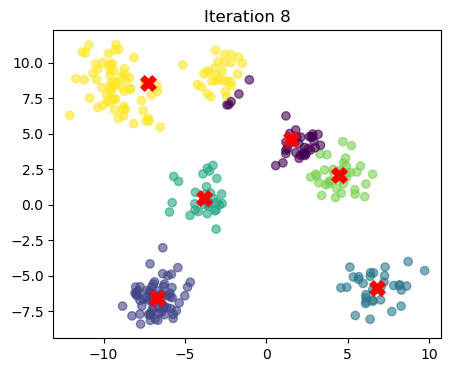

In [77]:
my.fit_predict(x, animate=True, save_path="kmeans_demo.gif")

In [78]:
from sklearn.cluster import KMeans


km = KMeans(6)

In [79]:
y_p = km.fit_predict(x)

c:\Users\WELCOME\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


In [80]:
# fig,ax = plt.subplots()
my = My_Kmean_cluster() 

In [81]:
my.centroid = km.cluster_centers_

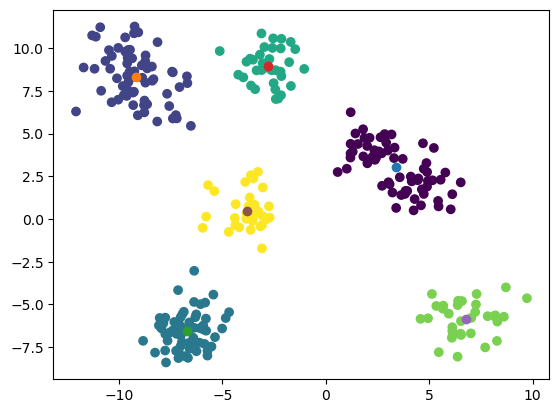

In [82]:
fig,ax = plt.subplots()
my.get_scatter(x,y_p,ax)

c:\Users\WELCOME\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\WELCOME\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\WELCOME\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\WELCOME\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak o

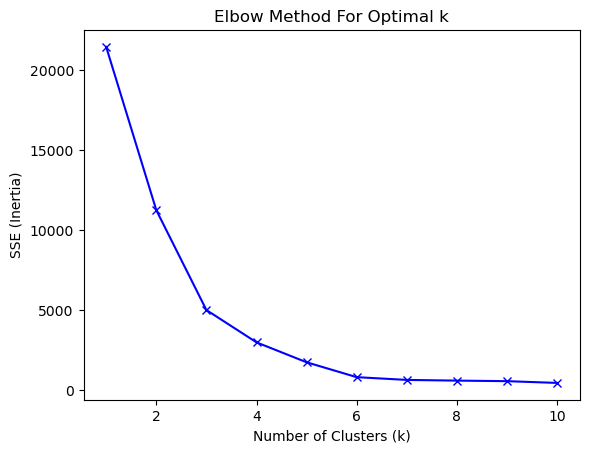

In [75]:
sse = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(x)
    sse.append(kmeans.inertia_)  # Inertia = sum of squared distances

# Plot Elbow
plt.plot( K,sse, 'bx-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('SSE (Inertia)')
plt.title('Elbow Method For Optimal k')
plt.show()